In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [11]:
f = open("Data/data_banknote_authentication.txt", "r")
f = f.read().splitlines()

data = np.array([f[0].split(",")])

#*******Debugging print statementes**********
#print(data)
#print(data.shape)

for i in range(1, len(f), 1):
    temp = np.array([f[i].split(",")])
    data = np.insert(temp, 0, data, axis = 0)

[N,M] = data.shape

#*******Debugging print statementes**********
#print(N)
#print(M)

new_data = np.zeros((N,M))

for i in range(N):
    for j in range(M):
        new_data[i][j] = float(data[i][j])
        
#*******Debugging print statementes**********
print(new_data)
print(new_data.shape)

features = np.zeros((N,M-1))
target = np.zeros(N)

#*******Debugging print statementes**********
#print(features.shape)
#print(target.shape)

for i in range(N):
    target[i] = new_data[i][4]
    for j in range(M-1):
        features[i][j] = new_data[i][j]
        
#*******Debugging print statementes**********
print(features)
print(features.shape)
print(target)
print(target.shape)

[[  3.6216    8.6661   -2.807    -0.446     0.     ]
 [  4.5459    8.1674   -2.458    -1.462     0.     ]
 [  3.866    -2.638     1.9242    0.1064    0.     ]
 ...
 [ -3.7503  -13.458    17.5932   -2.7771    1.     ]
 [ -3.5637   -8.3827   12.393    -1.2823    1.     ]
 [ -2.5419   -0.65804   2.6842    1.1952    1.     ]]
(1372, 5)
[[  3.6216    8.6661   -2.807    -0.446  ]
 [  4.5459    8.1674   -2.458    -1.462  ]
 [  3.866    -2.638     1.9242    0.1064 ]
 ...
 [ -3.7503  -13.458    17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
(1372, 4)
[0. 0. 0. ... 1. 1. 1.]
(1372,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(features, target, test_size = 1/3, random_state = 2455)

#*******Debugging print statementes**********
print("X_train", X_train)
print("X_train", X_train.shape)
print("X_test", X_test)
print("X_test", X_test.shape)

#print("t_train:", t_train)
print("t_train:", t_train.shape)
#print("t_test:", t_test)
print("t_test:", t_test.shape)

X_train [[ 1.3087   4.9228   2.0013   0.2202 ]
 [-1.616    0.809    8.1628   0.6081 ]
 [ 4.2134  -2.806    2.0116   0.6741 ]
 ...
 [ 0.06252  2.9301  -3.5467  -2.6737 ]
 [ 3.4312   6.2637  -1.951   -0.361  ]
 [ 5.2012   0.3269   0.1796   1.1797 ]]
X_train (914, 4)
X_test [[ 0.8956   7.7763  -2.747   -1.935  ]
 [ 3.946    6.8514  -1.544   -0.558  ]
 [-0.9358  -5.1008   4.5367   1.3866 ]
 ...
 [-6.2003   8.6806   0.00913 -3.703  ]
 [-0.954    1.9824  -2.3163  -1.1957 ]
 [-1.2424  -1.7175  -0.5255  -0.2103 ]]
X_test (458, 4)
t_train: (914,)
t_test: (458,)


In [13]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#print(X_train)
print("X_train shape:",X_train.shape)
#print(X_test)
print("X_test shape:",X_test.shape)


X_train shape: (914, 4)
X_test shape: (458, 4)


In [48]:
from sklearn import utils
n1 = np.array([2,3,4,5,25]) # n1 values being chosen
n2 = np.array([2,3,4,5,25]) # n2 value being chosen
#n1 = np.array([2,3]) # n1 values being chosen
#n2 = np.array([2,3]) # n2 value being chosen
 
epoch = 100
[N_row, N_col] = X_train.shape
[M_row, N_col] = X_test.shape
#N_row = 2
#M_row = 2

print(X_train[0,:])

alpha = 0.005
#err = np.array(np.zeros())
costs = np.array(np.zeros((2,2)))
print(costs)

[0.32477982 0.50995098 0.12564054 0.6714182 ]
[[0. 0.]
 [0. 0.]]


In [49]:
import random
combination = (len(n1)*len(n2))
costs = np.array(np.zeros(combination))
costs_gen = np.array([np.zeros(5)])
j = 0

cost_test = np.array(np.zeros(5))
cost_val = np.array(np.zeros(5))

# finding the optimal configuration
for n_1 in n1:
    for n_2 in n2:
        # running 5 times to find the optimal weight
        for i in range(0, 5, 1):
            
            length1 = N_col+1 # length for weight 1 matrix
            length2 = n_1+1 # length for weight 2 matrix
            length3 = n_2+1 # length for weight 3 matrix
            
            if(i == 0):
                w1_initial = np.array([np.zeros(length1)])
                w2_initial = np.array([np.zeros(length2)])
                w3_initial = np.array([np.zeros(length3)])

            w1 = random.sample(range(-25, 25), length1) # random initial weight 1
            w2 = random.sample(range(-25, 25), length2) # random initial weight 2
            w3 = random.sample(range(-25, 25), length3) # random initial weight 3
            
            print(".........Initial weights:.........")
            #print(w1)
            #print(w2)
            #print(w3)
            
            w1_initial = np.insert(np.array([w1]), 0, w1_initial, axis = 0)
            w2_initial = np.insert(np.array([w2]), 0, w2_initial, axis = 0)
            w3_initial = np.insert(np.array([w3]), 0, w3_initial, axis = 0)
            
            w1_full = np.array([w1])
            w2_full = np.array([w2])

            # adding the correct amount of rows to the weight 1 matrix
            for k in range(1, n_1, 1):
                w1_full = np.insert(np.array([w1]), 0, w1_full, axis = 0)
                
            # adding the correct amount of rows to the weight 2 matrix
            for k in range(1, n_2, 1):
                w2_full = np.insert(np.array([w2]), 0, w2_full, axis = 0)
                
            #*******Debugging print statementes**********
            print(w1_full)
            print(w2_full)
            print(w3)
            print("n1 =", n_1, " n2 =", n_2)
            
            # getting the final weights from SGD
            w1_full, w2_full, w3 = SGD(X_train, t_train, w1_full, w2_full, w3, alpha, epoch, N_row)
            
            # cost validation 
            for k_cross in range(0, M_row, 1):
                cost_val[i] += cross_entropy(X_test[k_cross,:], t_test[k_cross], w1_full, w2_full, w3)
                  
        cost_val /= N_row
        
        costs_gen = np.insert(np.array([cost_val]), 0, costs_gen, axis = 0)
        
        #*******Debugging print statementes**********
        #print("Test Cost:", cost_test)
        print("Validation Cost:", cost_val)
        
        # best weight from the 5 different initial weights
        best_w1 = w1_initial[np.argmin(cost_val)+1]
        best_w2 = w2_initial[np.argmin(cost_val)+1]
        best_w3 = w3_initial[np.argmin(cost_val)+1]
        
        costs[j] = cost_val[np.argmin(cost_val)]
        j += 1
        
        #*******Debugging print statementes**********
        print("best w1:",best_w1)
        print("best w2:",best_w2)
        print("best w3:",best_w3)

t = 0
for n_1 in n1:
    for n_2 in n2:
        print("t =", t)
        print("config:",n_1,n_2)
        t += 1
        
#*******Debugging print statementes**********
print("Cost for configuration for best weight:", costs)
print("lowest cost:",np.argmin(costs))
print("all costs:",costs_gen)

.........Initial weights:.........
[[-19 -25  -6   6 -18]
 [-19 -25  -6   6 -18]]
[[ 7 18 17]
 [ 7 18 17]]
[22, -2, 18]
n1 = 2  n2 = 2


<ipython-input-4-2cc86ac71014>:15: RuntimeWarning: overflow encountered in exp
  y = 1/(1+np.exp(-z))


.........Initial weights:.........
[[22 -8  8 16 11]
 [22 -8  8 16 11]]
[[ 23  20 -19]
 [ 23  20 -19]]
[23, 20, -22]
n1 = 2  n2 = 2
.........Initial weights:.........
[[-23   8  -6  14  24]
 [-23   8  -6  14  24]]
[[-11  -8  22]
 [-11  -8  22]]
[-9, 0, -23]
n1 = 2  n2 = 2
.........Initial weights:.........
[[  2  15 -18   3 -10]
 [  2  15 -18   3 -10]]
[[  9 -17 -22]
 [  9 -17 -22]]
[3, -3, -11]
n1 = 2  n2 = 2
.........Initial weights:.........
[[ 17 -13  12   0  18]
 [ 17 -13  12   0  18]]
[[  0  16 -19]
 [  0  16 -19]]
[0, -8, -17]
n1 = 2  n2 = 2
Validation Cost: [0.44143748 0.37146408 0.40453768 0.34310893 0.34733196]
best w1: [  2  15 -18   3 -10]
best w2: [  9 -17 -22]
best w3: [  3  -3 -11]
.........Initial weights:.........
[[-24  11  -8  -5  -1]
 [-24  11  -8  -5  -1]]
[[-19 -24   1]
 [-19 -24   1]
 [-19 -24   1]]
[18, -11, -10, -19]
n1 = 2  n2 = 3
.........Initial weights:.........
[[14 -7  1 -9  0]
 [14 -7  1 -9  0]]
[[ 8 14 18]
 [ 8 14 18]
 [ 8 14 18]]
[24, 20, -21, -25]
n1 

[ -9  -3 -13  -6 -10]
[17  5 -2]
[-15 -24   4  11  19  -4  23   9 -22   6   1 -23  12 -16  -3  -6   3 -21
 -14  24   8  20   5 -18  17  -1]
.........best weights:.........
[[ -9  -3 -13  -6 -10]
 [ -9  -3 -13  -6 -10]]
[[17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]
 [17  5 -2]]
[-15 -24   4  11  19  -4  23   9 -22   6   1 -23  12 -16  -3  -6   3 -21
 -14  24   8  20   5 -18  17  -1]
ep: 0


<ipython-input-4-2cc86ac71014>:15: RuntimeWarning: overflow encountered in exp
  y = 1/(1+np.exp(-z))


ep: 1
ep: 2
ep: 3
ep: 4
ep: 5
ep: 6
ep: 7
ep: 8
ep: 9
ep: 10
ep: 11
ep: 12
ep: 13
ep: 14
ep: 15
ep: 16
ep: 17
ep: 18
ep: 19
ep: 20
ep: 21
ep: 22
ep: 23
ep: 24
ep: 25
ep: 26
ep: 27
ep: 28
ep: 29
ep: 30
ep: 31
ep: 32
ep: 33
ep: 34
ep: 35
ep: 36
ep: 37
ep: 38
ep: 39
ep: 40
ep: 41
ep: 42
ep: 43
ep: 44
ep: 45
ep: 46
ep: 47
ep: 48
ep: 49
ep: 50
ep: 51
ep: 52
ep: 53
ep: 54
ep: 55
ep: 56
ep: 57
ep: 58
ep: 59
ep: 60
ep: 61
ep: 62
ep: 63
ep: 64
ep: 65
ep: 66
ep: 67
ep: 68
ep: 69
ep: 70
ep: 71
ep: 72
ep: 73
ep: 74
ep: 75
ep: 76
ep: 77
ep: 78
ep: 79
ep: 80
ep: 81
ep: 82
ep: 83
ep: 84
ep: 85
ep: 86
ep: 87
ep: 88
ep: 89
ep: 90
ep: 91
ep: 92
ep: 93
ep: 94
ep: 95
ep: 96
ep: 97
ep: 98
ep: 99
test cost: [0.68982214 0.68982214 0.68982214 0.68982214 0.68982214 0.68982214
 0.68982214 0.68982214 0.68982214 0.68982214 0.68982214 0.68982214
 0.68982214 0.68982214 0.68982214 0.68982214 0.68982214 0.68982214
 0.68982214 0.68982214 0.68982214 0.68982214 0.68982214 0.68982214
 0.68982214 0.68982214 0.68982214 0.6

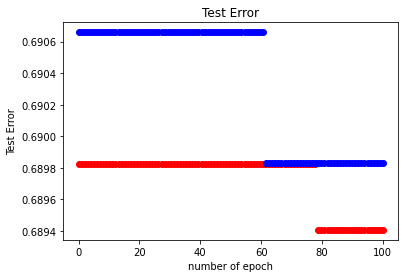

In [59]:
#n1 = np.array([2,3,4,5,10,15]) # n1 values being chosen
#n2 = np.array([2,3,4,5,10,15]) # n2 value being chosen

best_n1 = 2 # best n1 config
best_n2 = 25 # best n2 config

# best weight manual implementation
best_w1 = np.array([ -9 , -3 ,-13,  -6, -10])
best_w2 = np.array([17 , 5 ,-2])
best_w3 = np.array([-15, -24,   4 , 11 , 19 , -4  ,23 ,  9 ,-22,   6 ,  1, -23,  12, -16,  -3,  -6 ,  3, -21,-14 , 24 ,  8 , 20 ,  5, -18 , 17 , -1])

w1_best = np.array(best_w1)
w2_best = np.array(best_w2)
w3_best = np.array(best_w3)

print(w1_best)
print(w2_best)
print(w3_best)

for i in range(1, best_n1, 1):
    w1_best = np.insert(np.array([best_w1]), 0, w1_best, axis = 0)
    
for i in range(1, best_n2, 1):
    w2_best = np.insert(np.array([best_w2]), 0, w2_best, axis = 0)

print(".........best weights:.........")
print(w1_best)
print(w2_best)
print(w3_best)

epoch = 100

# best costs using the optimal parameters 
best_test_cost = np.array(np.zeros(epoch))
best_val_cost = np.array(np.zeros(epoch))

# training the neural network with the best parameters 
for ep in range(0, epoch, 1):
    print("ep:",ep)
    for IT in range(0, N_row, 1):
        gradient1, gradient2, gradient3 = optimal_parameters(X_train[IT,:], t_train[IT], w1_best, w2_best, w3_best) # gettign the gradient
        w1_best = w1_best - (alpha*gradient1) # new weight 1
        w2_best = w2_best - (alpha*gradient2) # new weight 2 
        w3_best = w3_best - (alpha*gradient3) # new weight 3
        
    for k_cross in range(0, N_row, 1):
            best_test_cost[ep] += cross_entropy(X_train[k_cross,:], t_train[k_cross], w1_best, w2_best, w3_best)
    for k_cross in range(0, M_row, 1):
            best_val_cost[ep] += cross_entropy(X_test[k_cross,:], t_test[k_cross], w1_best, w2_best, w3_best)
    
best_test_cost /= N_row
best_val_cost /= M_row
x_axis = np.linspace(0, epoch, num = epoch)

print("test cost:",best_test_cost)
print("validation cost:",best_val_cost)

# plotting the costs 
plt.scatter(x_axis, best_test_cost, color = 'red')
plt.scatter(x_axis, best_val_cost, color = 'blue')
plt.title('Test Error')
plt.ylabel('Test Error')
plt.xlabel('number of epoch')
plt.show()


In [1]:
###### function to calculate the gradient descent using the optimal_parameters
###### function to find the gradient and then returning the final weights after
###### epoch iteration
# *********************************Parameters***********************************
# X_train: training set
# t_train: training set targets
# w1_full: variable for the first weight
# w2_full: variable for the second weight
# w3: variable for the third weight
# alpha: variable for calculating gradient
# epoch: variable for epoch iteration
# N_row: length of the training set

def SGD(X_train, t_train, w1_full, w2_full, w3, alpha, epoch, N_row):
    cost_val = 0
    for ep in range(0, epoch, 1):
        #print("***********************************************Epoch",ep, "***********************************************")

        X_train_shuffle, t_train_shuffle = utils.shuffle(X_train, t_train) # shuffling the training set

        # running through each feature
        for IT in range(0, N_row, 1):
            #print("%%%%%%%%%%%%%%%%%%%%%%%%% Iteration:", IT," %%%%%%%%%%%%%%%%%%%%%%%%%")
            gradient1, gradient2, gradient3 = optimal_parameters(X_train_shuffle[IT,:], t_train_shuffle[IT], w1_full, w2_full, w3) # gettign the gradient

            w1_full = w1_full - (alpha*gradient1) # new weight 1
            w2_full = w2_full - (alpha*gradient2) # new weight 2 
            w3 = w3 - (alpha*gradient3) # new weight 3

        # cross-validation for training and test set
        #for k_cross in range(0, N_row, 1):
        #        cost_test[i] += cross_entropy(X_train[k_cross,:], t_train[k_cross], w1_full, w2_full, w3)
        
    
    return w1_full, w2_full, w3

In [2]:
###### function to calculate the z1 and h1 parameters for forward pass
# *********************************Parameters***********************************
# X_train: training set
# W: weight 1 matrix

def z1_and_h(W, X_train):
    
    ones = np.array([1])
    X = np.insert(X_train, 0, ones, axis = 0)

    #*******Debugging print statementes**********
    #print(X)
    #print(X.shape)
        
    z = np.dot(W,X)
    #*******Debugging print statementes**********
    #print(z)
    #print(z.shape)
    
    N_col = len(z)
    h = np.zeros(N_col)
    
    #*******Debugging print statementes**********
    #print(h)
    #print(h.shape)
    
    for i in range(0, N_col, 1):
        if(z[i] < 0):
            h[i] = 0
        else:
            h[i] = z[i]
    
    return z,h

In [3]:
###### function to calculate the z2 and h2 parameters for forward pass
# *********************************Parameters***********************************
# X_train: training set
# W: weight 2 matrix

def z2_and_h(W, X_train):

    ones = np.array([1])
    X = np.insert(X_train, 0, ones, axis = 0)

    #*******Debugging print statementes**********
    #print(X)
    #print(X.shape)
    #print(W)
    
    z = np.dot(W,X)
    #*******Debugging print statementes**********
    #print(z)
    #print(z.shape)
    
    N_col = len(z)
    h = np.zeros(N_col)
    
    #*******Debugging print statementes**********
    #print(h)
    #print(h.shape)
    
    for i in range(0, N_col, 1):
        if(z[i] < 0):
            h[i] = 0
        else:
            h[i] = z[i]
    
    return z,h

In [4]:
###### function to calculate the z3 and final output parameters for forward pass
# *********************************Parameters***********************************
# X_train: training set
# W: weight 3 matrix

def z3_and_output(W, X_train):
    ones = np.array([1])
    X = np.insert(X_train, 0, ones, axis = 0)

    #*******Debugging print statementes**********
    #print("X:",X)
    #print(X.shape)
    #print("W:", W)
    
    z = np.dot(W,X)
    #*******Debugging print statementes**********
    #print("z:",z)
    #print(z.shape)
    
    y = 1/(1+np.exp(-z))
    
    return z,y

In [5]:
###### function to calculate the partial_z, partial_wj, partial_zj for backward
###### pass
# *********************************Parameters***********************************
# y: output from forward pass
# t_train: training set results
# h: variable calculated from the forwardpass
# z2: z-value calculated from the forwardpass
# w: variable for weights

def partial_3(y, t_train, h, z2, w):
    #print("y:", y)
    #print("t:", t_train)
    #print("h", h)
    #print("z2:", z2)
    #print("w3:", w)
    
    ones = np.array([1])
    X = np.insert(h, 0, ones, axis = 0)
    #*******Debugging print statementes**********
    #print("X:",X)
    
    partial_z = -t_train+y
    #*******Debugging print statementes**********
    #print("partial_z:",partial_z)
    
    partial_wj = np.dot(partial_z,X)
    #*******Debugging print statementes**********
    #print("partial_w:",partial_w)
    #print("partial_w:",len(partial_wj))
    
    h_len = len(h)
    #*******Debugging print statementes**********
    #print(h_len)
    
    g_prime = np.array(np.zeros(h_len))   
    for i in range(0, h_len, 1):
        if(z2[i] < 0):
            g_prime[i] = 0
        elif(z2[i] >= 0):
            g_prime[i] = 1
    g_prime = np.array(g_prime)
    #*******Debugging print statementes**********
    #print("g_prime:",g_prime)
    
    partial_zj = np.array(np.zeros(h_len))
    w_bar = np.array(w[1:])
    partial_product = np.dot(w_bar,partial_z)
    #*******Debugging print statementes**********
    #print("partial_zj:", partial_zj)
    #print(partial_product)
    
    for i in range(0, h_len, 1):
        partial_zj[i] = g_prime[i]*partial_product[i]
    #*******Debugging print statementes**********
    #print("partial_zj2",partial_zj)
    
    return partial_z, partial_wj, partial_zj

In [6]:
###### function to calculate the partial_wj2, partial_zj1 for backward
###### pass
# *********************************Parameters***********************************
# partial_zj2: variable calculated previous step from the backward pass
# h: variable calculated from the forwardpass
# z: z-value calculated from the forwardpass
# w: variable for weights

def partial_2(partial_zj2, h, z, w):
    #print("y:", y)
    #print("t:", t_train)
    #print("h", h)
    #print("z2:", z2)
    #print("w:", w)
    #print("z:", z)
    #print("partial_zj2:", partial_zj2)
    
    ones = np.array([1])
    X = np.insert(h, 0, ones, axis = 0)
    X = np.array([X])
    #*******Debugging print statementes**********
    #print("X:",X)
    #print("X:",X.shape)
    
    #partial_zj = np.array([partial_zj2])
    #*******Debugging print statementes**********
    #print(partial_zj.shape)
    
    partial_wj2 = np.dot(np.array([partial_zj2]).T,X)
    #*******Debugging print statementes**********
    #print("partial_wj2:",partial_wj2)
    
    h_len = len(h)
    #*******Debugging print statementes**********
    #print(h_len)
    
    g_prime = np.array(np.zeros(h_len))   
    for i in range(0, h_len, 1):
        if(z[i] < 0):
            g_prime[i] = 0
        elif(z[i] >= 0):
            g_prime[i] = 1
    g_prime = np.array(g_prime)
    #print("g_prime:",g_prime)
    
    #partial_zj1 = np.array(np.zeros(h_len))
    
    w_bar = np.array(w[:,1:])
    #print("w_bar:", w_bar)
    partial_product = np.dot(w_bar.T,partial_zj2.T)
    #print("partial product:", partial_product)
    partial_zj1 = np.array(np.zeros(h_len))
    #partial_zj1 = np.array(g_prime[0]*partial_product[0])
    
    #*******Debugging print statementes**********
    #print("partial_zj1:", partial_zj1)
    #print("partial product:", partial_product)
    
    for i in range(0, h_len, 1):
        partial_zj1[i] = g_prime[i]*partial_product[i]
    #*******Debugging print statementes**********
    #print("partial_zj1:", partial_zj1)
    
    return partial_wj2, partial_zj1

In [7]:
###### function to calculate the partial_wj1
# *********************************Parameters***********************************
# X_train: training set
# partial_zj1: calculated from the previous step of the backward pass

def partial_1(X_train, partial_zj1):
    #print("partial_zj1:", partial_zj1)
    
    ones = np.array([1])
    X = np.insert(X_train, 0, ones, axis = 0)
    X = np.array([X])
    #*******Debugging print statementes**********
    #print("X:",X)
    #print("X:",X.shape)
    
    partial_wj1 = np.dot(np.array([partial_zj1]).T,X)
    #print("partial_wj1:", partial_wj1)
    
    return partial_wj1

In [8]:
###### function to calculate the partial_wj1, partial_wj2, partial,wj3 for 
###### calculating the gradient descent
# *********************************Parameters***********************************
# X_train: training set
# t_train: traing set targets
# w1: weight 1 matrix
# w2: weight 2 matrix
# w3: weight 3 matrix

def optimal_parameters(X_train, t_train, w1, w2, w3):
    #print("X_train:", X_train)
    #print("t_train:", t_train)
    
    #*******Debugging print statementes**********
    #w0_1[i], w0_2[i], w0_3[i], err_valid[i] = initial_gradient(X_train, X_test, t_train, t_test, n1, n2, i, j)
    #[w1_row, w1_col] = w1.shape
    #[w2_row, w2_col] = w2.shape
    #[w3_row, w3_col] = w3.shape
    
    z1,h1 = z1_and_h(w1, X_train)
    z2,h2 = z2_and_h(w2, h1)
    z3,final = z3_and_output(w3, h2)
    
    partial_z3, partial_wj3, partial_zj2 = partial_3(final, t_train, h2, z2, w3)
    partial_wj2, partial_zj1 = partial_2(partial_zj2, h1, z1, w2)
    partial_wj1 = partial_1(X_train, partial_zj1)
    
    #*******Debugging print statementes**********
    #print("z1:",z1)
    #print("h1",h1)
    #print("z2:",z2)
    #print("h2",h2)
    #print("final output:", final)
    #print("partial_wj1:",partial_wj1)
    #print("partial_wj2:",partial_wj2)
    #print("partial_wj3:",partial_wj3)
    
    return partial_wj1, partial_wj2, partial_wj3

In [9]:
###### function to calculate the cross-entropy
# *********************************Parameters***********************************
# X: training set
# t: traing set targets
# w1: weight 1 matrix
# w2: weight 2 matrix
# w3: weight 3 matrix

def cross_entropy(X, t, w1, w2, w3):
    
    z1,h1 = z1_and_h(w1, X)
    z2,h2 = z2_and_h(w2, h1)
    z3,final = z3_and_output(w3, h2)
    
    final = np.round(final)
    #print("t =", t, " y =", final)
    
    cost = (t * np.logaddexp(0, -final)) + ((1 - t) * np.logaddexp(0, final))
    #print(cost)
    
    return cost